🛠️ End-to-End Loan Eligibility Prediction Pipeline
---
Author: Xuanci Yang 
Tech Stack: Python, Scikit-learn, SMOTE, Pandas  
Key Highlights: Feature Engineering, Log Transformation, GridSearch Tuning, Model Comparison

> Project Summary: This notebook demonstrates a complete workflow from raw data cleaning to model deployment. It includes handling class imbalance with SMOTE, normalizing skewed distributions, and comparing 5 different algorithms to find the optimal solution.
---

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
train = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')
predict = pd.read_csv('test_Y3wMUE5_7gLdaTN.csv')

In [8]:
train_original = train.copy()

In [9]:
train.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [11]:
train.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [12]:
# Drop 'Loan_ID' column
train = train.drop(columns=['Loan_ID'])

In [13]:
# Check unique values of all non-numeric columns
unique_values = {column: train[column].unique() for column in train.select_dtypes(exclude=['number']).columns}
unique_values

{'Gender': array(['Male', 'Female', nan], dtype=object),
 'Married': array(['No', 'Yes', nan], dtype=object),
 'Dependents': array(['0', '1', '2', '3+', nan], dtype=object),
 'Education': array(['Graduate', 'Not Graduate'], dtype=object),
 'Self_Employed': array(['No', 'Yes', nan], dtype=object),
 'Property_Area': array(['Urban', 'Rural', 'Semiurban'], dtype=object),
 'Loan_Status': array(['Y', 'N'], dtype=object)}

In [14]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer, SimpleImputer

In [15]:
# Separate numeric and object columns
numeric_columns = train.select_dtypes(include=['float64', 'int64']).columns
object_columns = train.select_dtypes(include=['object']).columns

# 1. Use KNNImputer to fill missing values for numeric columns
knn_imputer = KNNImputer(n_neighbors=5)
train[numeric_columns] = knn_imputer.fit_transform(train[numeric_columns])

# 2. Use SimpleImputer (most_frequent) to fill missing values for object columns
simple_imputer = SimpleImputer(strategy='most_frequent')
train[object_columns] = simple_imputer.fit_transform(train[object_columns])

# Check data after imputation
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849.0,0.0,147.8,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [16]:
# Check the number of missing values in each column of the dataset
train.isnull().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


In [17]:
# Check unique values of all non-numeric columns
unique_values = {column: train[column].unique() for column in train.select_dtypes(exclude=['number']).columns}
unique_values

{'Gender': array(['Male', 'Female'], dtype=object),
 'Married': array(['No', 'Yes'], dtype=object),
 'Dependents': array(['0', '1', '2', '3+'], dtype=object),
 'Education': array(['Graduate', 'Not Graduate'], dtype=object),
 'Self_Employed': array(['No', 'Yes'], dtype=object),
 'Property_Area': array(['Urban', 'Rural', 'Semiurban'], dtype=object),
 'Loan_Status': array(['Y', 'N'], dtype=object)}

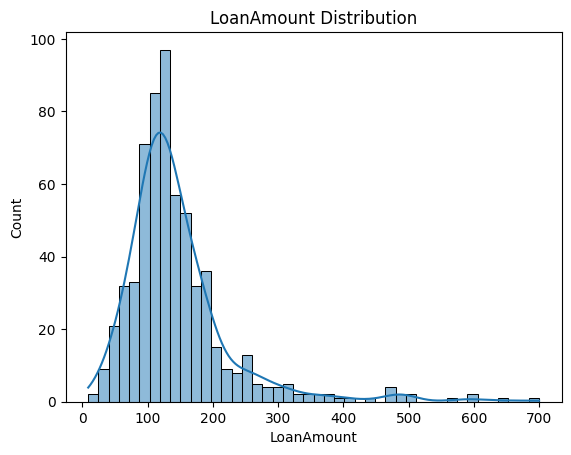

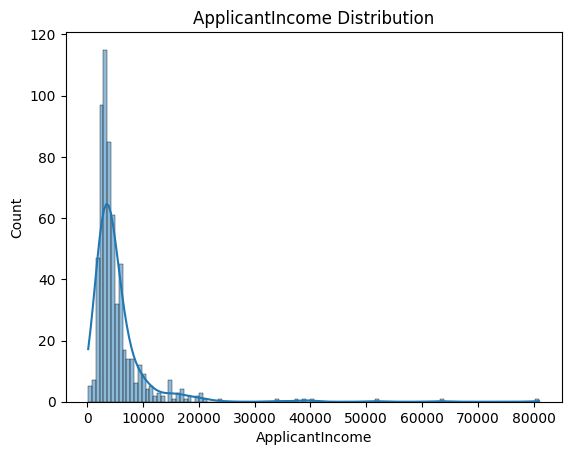

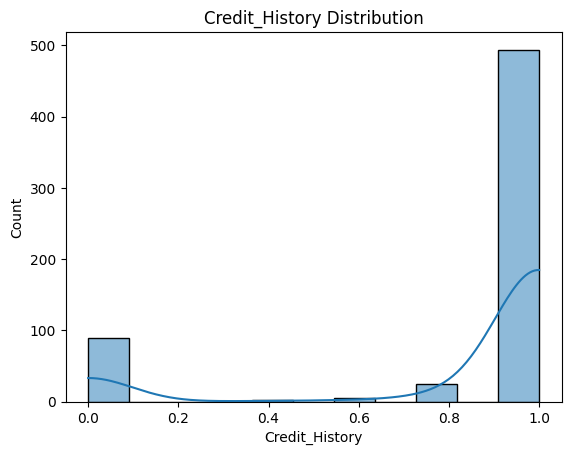

In [18]:
#'LoanAmount'
sns.histplot(train['LoanAmount'], kde=True)
plt.title('LoanAmount Distribution')
plt.show()

#'ApplicantIncome'
sns.histplot(train['ApplicantIncome'], kde=True)
plt.title('ApplicantIncome Distribution')
plt.show()

#'Credit_History'
sns.histplot(train['Credit_History'], kde=True)
plt.title('Credit_History Distribution')
plt.show()

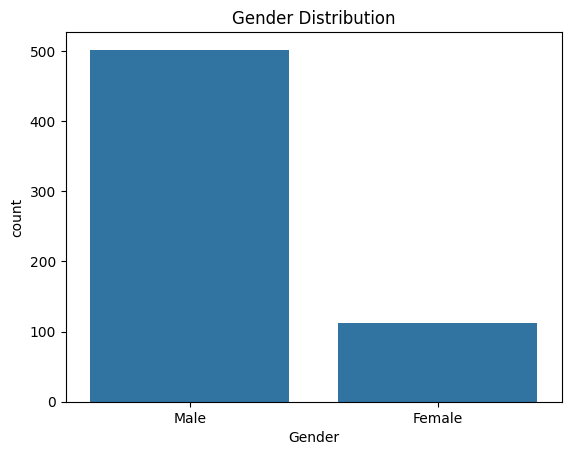

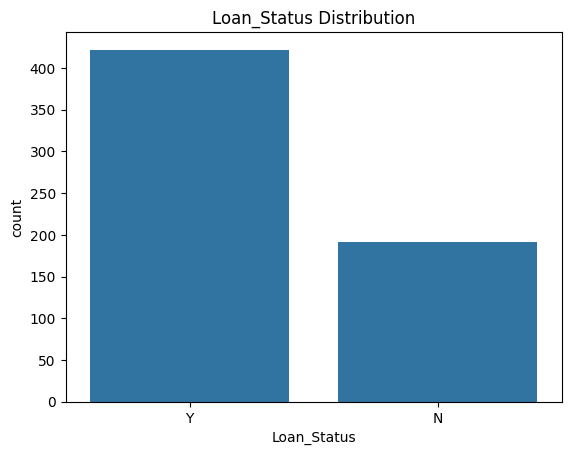

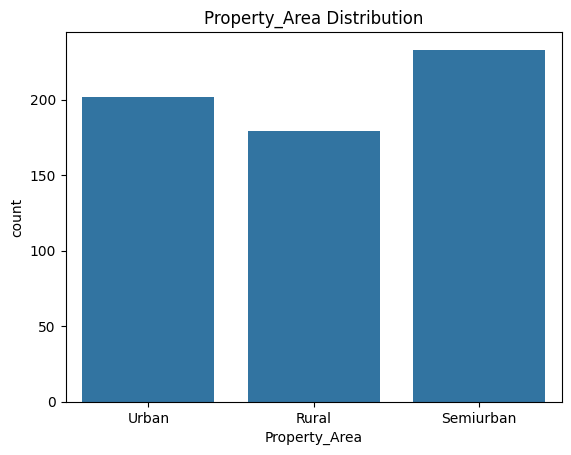

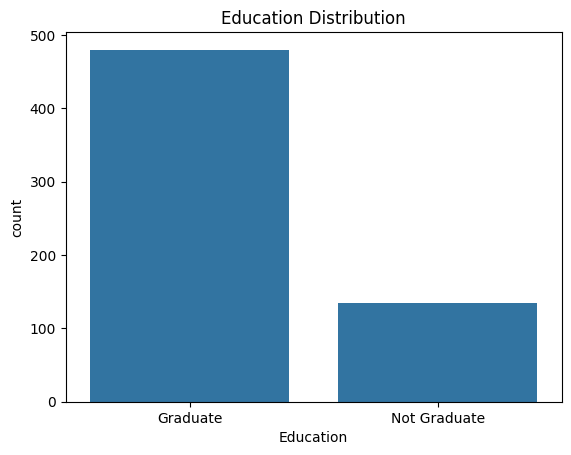

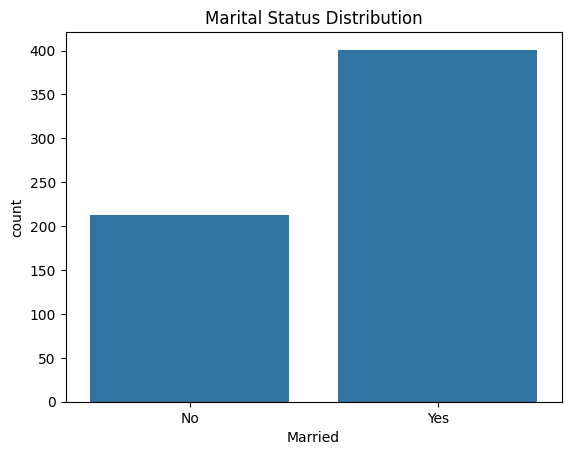

In [19]:
# Distribution of 'Gender'
sns.countplot(x='Gender', data=train)
plt.title('Gender Distribution')
plt.show()

# Distribution of 'Loan_Status'
sns.countplot(x='Loan_Status', data=train)
plt.title('Loan_Status Distribution')
plt.show()

# Distribution of 'Property_Area'
sns.countplot(x='Property_Area', data=train)
plt.title('Property_Area Distribution')
plt.show()

# Distribution of 'Education'
sns.countplot(x='Education', data=train)
plt.title('Education Distribution')
plt.show()

# Distribution of 'Married'
sns.countplot(x='Married', data=train)
plt.title('Marital Status Distribution')
plt.show()

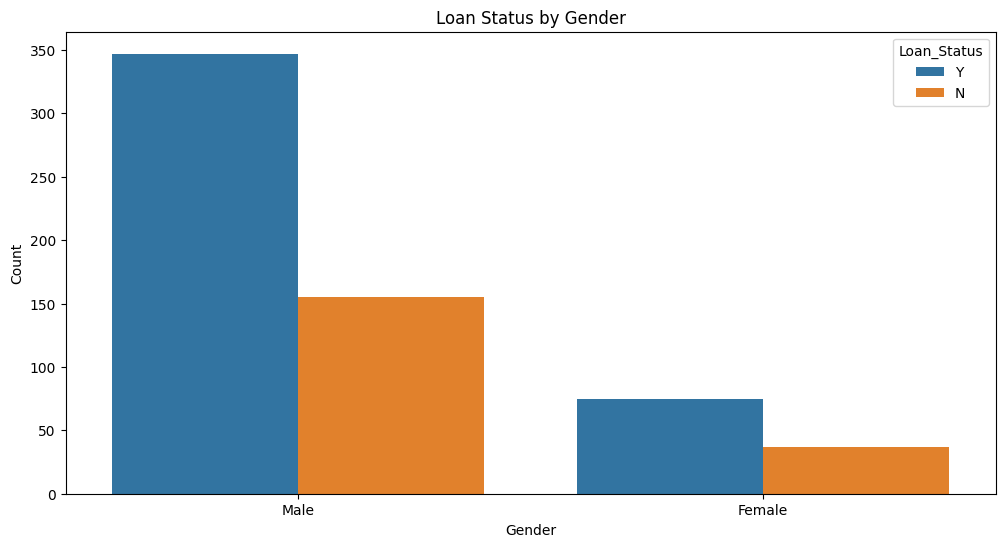

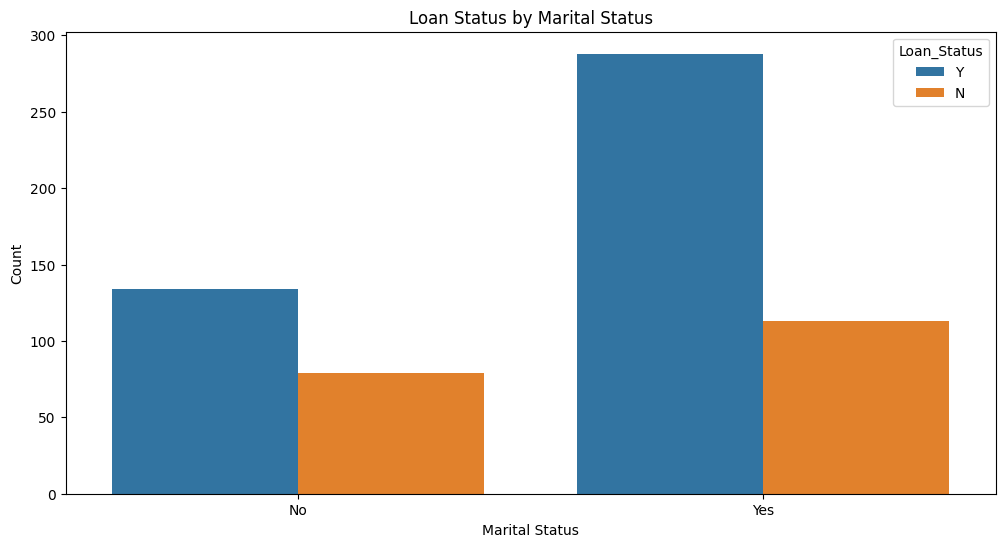

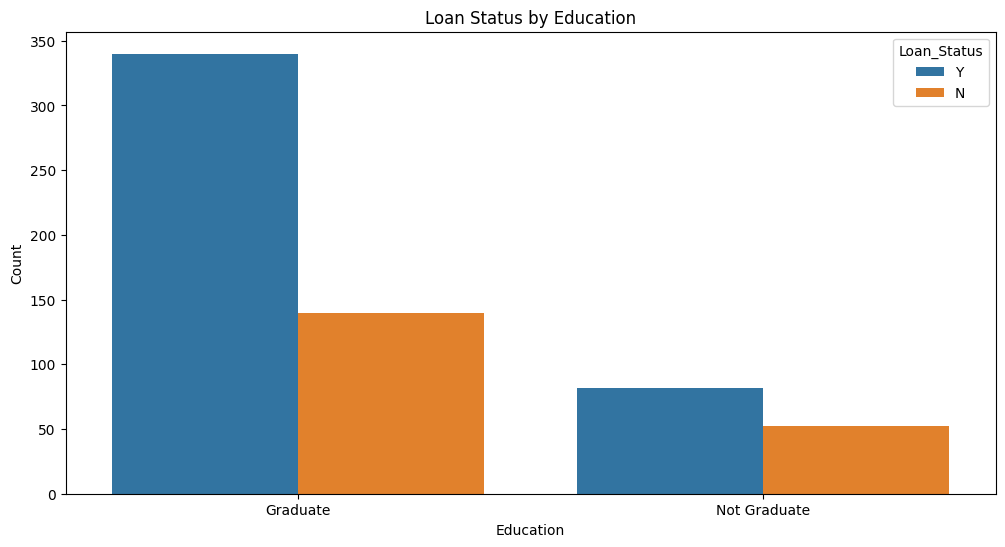

In [20]:
# 1. Loan status analysis for different groups such as gender, marital status, and education
# Loan approval success rate by gender
plt.figure(figsize=(12, 6))
sns.countplot(x='Gender', hue='Loan_Status', data=train)
plt.title('Loan Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Loan status by marital status
plt.figure(figsize=(12, 6))
sns.countplot(x='Married', hue='Loan_Status', data=train)
plt.title('Loan Status by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

# Loan status by education background
plt.figure(figsize=(12, 6))
sns.countplot(x='Education', hue='Loan_Status', data=train)
plt.title('Loan Status by Education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()

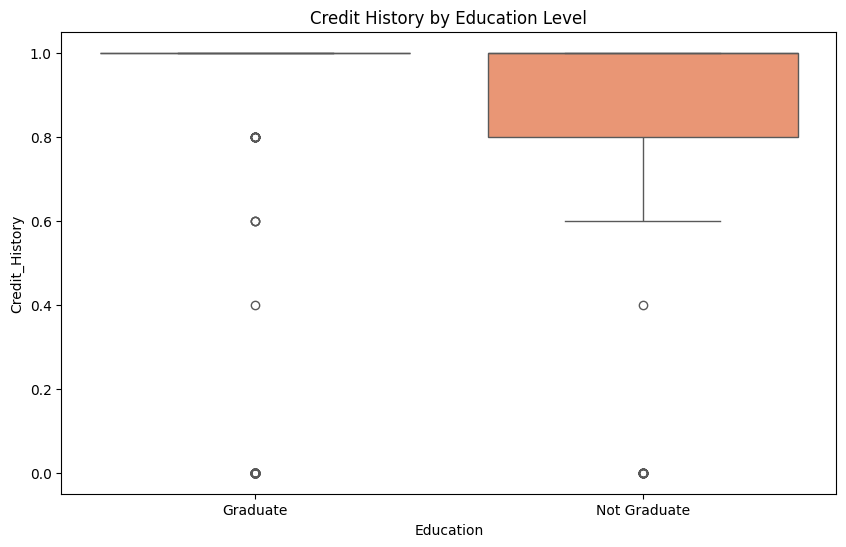

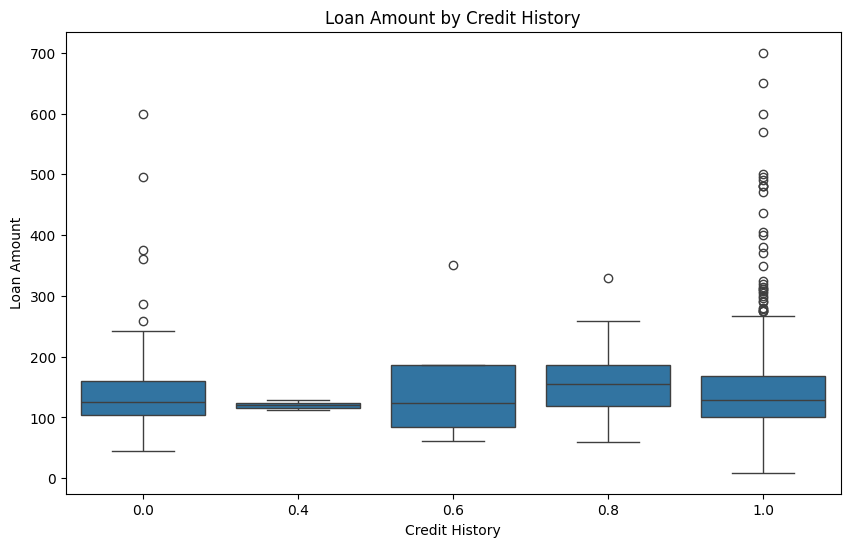

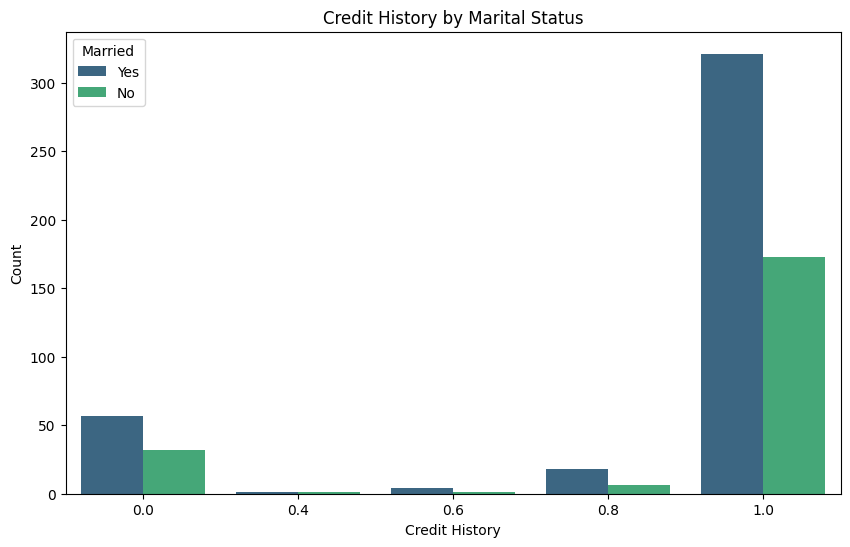

In [21]:
# 1. Relationship between Credit History and Education Level
plt.figure(figsize=(10, 6))
sns.boxplot(x='Education', y='Credit_History', data=train, hue='Education', palette='Set2', legend=False)
plt.title('Credit History by Education Level')
plt.show()

# 2. Relationship between Credit History and Loan Amount
plt.figure(figsize=(10, 6))
sns.boxplot(x='Credit_History', y='LoanAmount', data=train)
plt.title('Loan Amount by Credit History')
plt.xlabel('Credit History')
plt.ylabel('Loan Amount')
plt.show()

# 3. Relationship between Credit History and Marital Status
plt.figure(figsize=(10, 6))
sns.countplot(x='Credit_History', hue='Married', data=train, palette='viridis')
plt.title('Credit History by Marital Status')
plt.xlabel('Credit History')
plt.ylabel('Count')
plt.show()

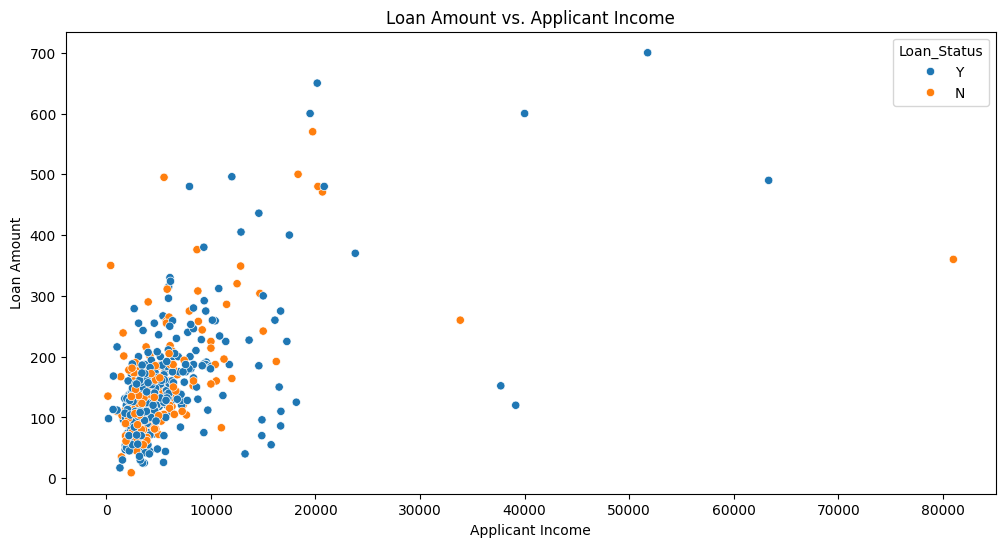

In [22]:
# Explore the relationship between Loan Amount and other factors
# Focus on three variables: Loan Amount, Loan Status, and Income
plt.figure(figsize=(12, 6))
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', data=train, hue='Loan_Status')
plt.title('Loan Amount vs. Applicant Income')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.show()

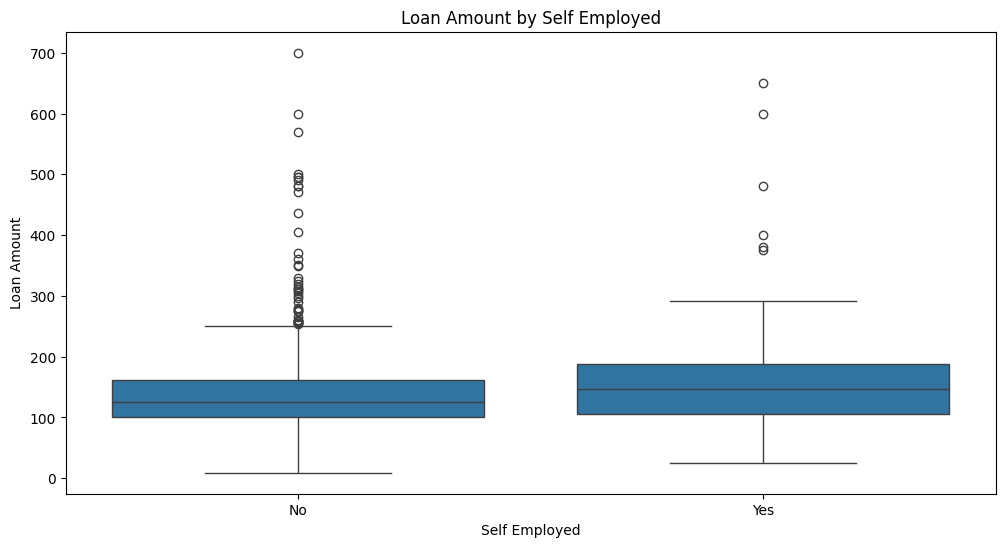

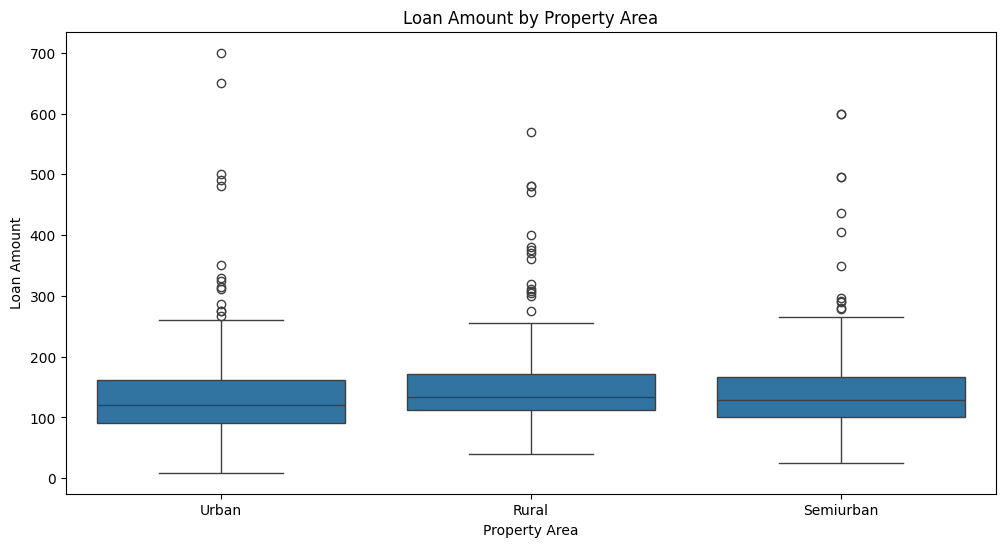

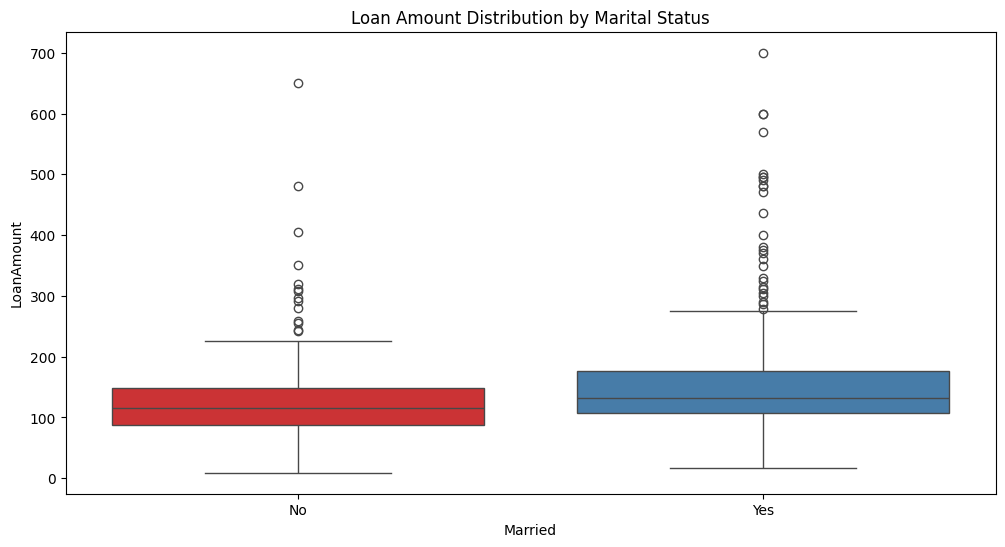

In [23]:
# Relationship between Self Employment and Loan Amount
plt.figure(figsize=(12, 6))
sns.boxplot(x='Self_Employed', y='LoanAmount', data=train)
plt.title('Loan Amount by Self Employed')
plt.xlabel('Self Employed')
plt.ylabel('Loan Amount')
plt.show()

# Relationship between Property Area and Loan Amount
plt.figure(figsize=(12, 6))
sns.boxplot(x='Property_Area', y='LoanAmount', data=train)
plt.title('Loan Amount by Property Area')
plt.xlabel('Property Area')
plt.ylabel('Loan Amount')
plt.show()

# Relationship between Marital Status and Loan Amount
plt.figure(figsize=(12, 6))
sns.boxplot(x='Married', y='LoanAmount', data=train, hue='Married', palette='Set1', legend=False)
plt.title('Loan Amount Distribution by Marital Status')
plt.show()

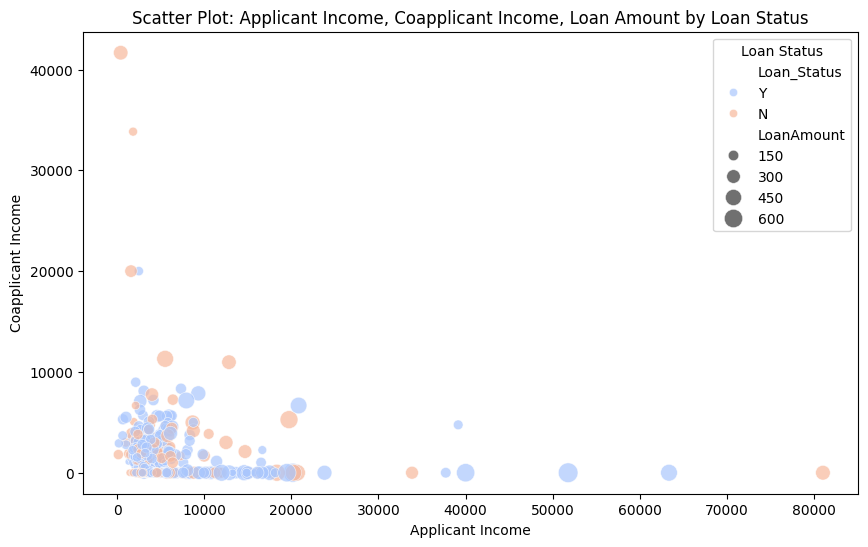

In [24]:
# Relationship between Applicant Income, Coapplicant Income, and Loan Amount (distinguished by Loan Status)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ApplicantIncome',
                y='CoapplicantIncome',
                hue='Loan_Status',
                size='LoanAmount',
                sizes=(20, 200),
                data=train,
                palette='coolwarm',
                alpha=0.7)
plt.title('Scatter Plot: Applicant Income, Coapplicant Income, Loan Amount by Loan Status')
plt.xlabel('Applicant Income')
plt.ylabel('Coapplicant Income')
plt.legend(title='Loan Status')
plt.show()

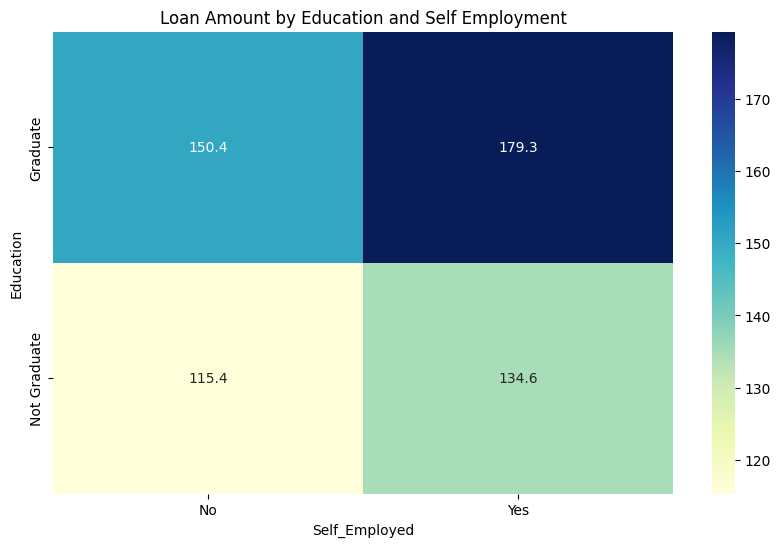

In [25]:
# Relationship between Loan Amount and both Education Level and Self Employment
loan_pivot = train.pivot_table(values='LoanAmount', index='Education', columns='Self_Employed', aggfunc='mean')
plt.figure(figsize=(10, 6))
sns.heatmap(loan_pivot, annot=True, cmap='YlGnBu', fmt='.1f')
plt.title('Loan Amount by Education and Self Employment')
plt.show()

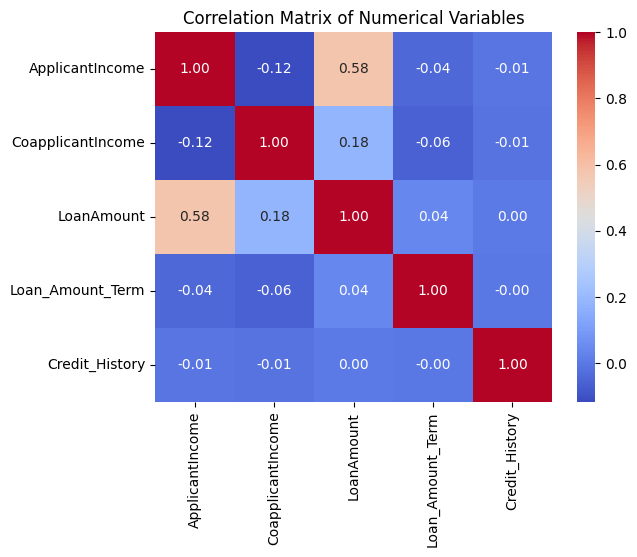

In [26]:
# Compute correlations among numerical variables
correlation_matrix = train[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

In [27]:
# Split the dataset into two classes: Y and N
Y = train[train['Loan_Status'] == 'Y']
N = train[train['Loan_Status'] == 'N']

# Randomly downsample the majority class 'Y' to match the number of 'N' samples
Y_downsampled = Y.sample(n=len(N), random_state=42)

# Combine the downsampled Y samples with the original N samples
train = pd.concat([Y_downsampled, N])

# Shuffle the dataset (comment only; code not included)
train = train.sample(frac=1, random_state=42).reset_index(drop=True)

train['Loan_Status'].value_counts()

X = train.drop('Loan_Status', axis = 1)
y = train['Loan_Status']

In [28]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

X = train.drop('Loan_Status', axis=1)
y = train['Loan_Status'].map({'Y': 1, 'N': 0})
# Apply one-hot encoding to categorical features
X_encoded = pd.get_dummies(X, drop_first=True)
# Initialize SMOTE for oversampling
smote = SMOTE(sampling_strategy='auto', random_state=42)
# Apply SMOTE to balance the dataset
X_resampled, y_resampled = smote.fit_resample(X_encoded, y)
# Convert the resampled output into a DataFrame
train_resampled = pd.DataFrame(X_resampled, columns=X_encoded.columns)
train_resampled['Loan_Status'] = y_resampled
# Check class distribution after resampling
print(train_resampled['Loan_Status'].value_counts())

Loan_Status
0    192
1    192
Name: count, dtype: int64


In [29]:
X = pd.get_dummies(X)
train = pd.get_dummies(train)
predict = pd.get_dummies(predict)

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
# Define the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Parameter grid
params = {
    'max_depth': [2, 3, 5, 10, 20, 30, 50, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 5, 10, 15],
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2', None, 0.1, 0.3, 0.5],
    'splitter': ['best', 'random'],
}

# Define GridSearchCV
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1,
                           verbose=1,
                           scoring="accuracy")

# Train the model
grid_search.fit(X_train, y_train)

grid_search.best_score_

Fitting 4 folds for each of 3072 candidates, totalling 12288 fits


np.float64(0.7089552238805971)

In [35]:
# Retrieve the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Use the best model to make predictions
predictions = best_model.predict(X_test)

# Import evaluation metrics
from sklearn.metrics import accuracy_score, classification_report

# Print classification report
print(classification_report(y_test, predictions))

# Accuracy score
accuracy_score(y_test, predictions)

              precision    recall  f1-score   support

           0       0.74      0.70      0.72        60
           1       0.69      0.73      0.71        56

    accuracy                           0.72       116
   macro avg       0.72      0.72      0.72       116
weighted avg       0.72      0.72      0.72       116



0.7155172413793104

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the model
rf = RandomForestClassifier(random_state=42)

# Parameter Grid
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'n_estimators': [10, 25, 30, 50, 100, 200]
}

# Define GridSearchCV
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1,
                           verbose=1,
                           scoring="accuracy")

# Train the model
grid_search.fit(X_train, y_train)

grid_search.best_score_

Fitting 4 folds for each of 150 candidates, totalling 600 fits


np.float64(0.7388059701492538)

In [37]:
# Retrieve the best model
best_rf_model = grid_search.best_estimator_

# Make predictions
rf_predictions = best_rf_model.predict(X_test)

# Evaluate metrics
from sklearn.metrics import accuracy_score, classification_report

# Print classification report
print(classification_report(y_test, rf_predictions))

# Accuracy score
accuracy_score(y_test, rf_predictions)

              precision    recall  f1-score   support

           0       0.70      0.65      0.67        60
           1       0.65      0.70      0.67        56

    accuracy                           0.67       116
   macro avg       0.67      0.67      0.67       116
weighted avg       0.67      0.67      0.67       116



0.6724137931034483

In [38]:
# Retrieve feature importance
rf_best = best_rf_model

# Create a DataFrame to store feature names and their importance scores
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

# Sort features by importance score in descending order
imp_df = imp_df.sort_values(by="Imp", ascending=False)

imp_df

,Varname,Imp
4,Credit_History,0.412290
1,CoapplicantIncome,0.136985
0,ApplicantIncome,0.108369
2,LoanAmount,0.092665
17,Property_Area_Rural,0.072424
9,Dependents_0,0.023225
3,Loan_Amount_Term,0.018848
14,Education_Not Graduate,0.017280
18,Property_Area_Semiurban,0.017021
8,Married_Yes,0.014597


Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Initialize
lr = LogisticRegression(random_state=42)

# Define hyperparameters for Logistic Regression
params_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['liblinear', 'lbfgs']
}

# Hyperparameter tuning
grid_search_lr = GridSearchCV(estimator=lr, param_grid=params_lr, cv=4, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search_lr.fit(X_train, y_train)

grid_search_lr.best_score_

Fitting 4 folds for each of 10 candidates, totalling 40 fits


np.float64(0.7238805970149254)

In [40]:
# Retrieve the model
best_lr_model = grid_search_lr.best_estimator_

# Make predictions
lr_predictions = best_lr_model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report

accuracy_score(y_test, lr_predictions)
print(classification_report(y_test, lr_predictions))

              precision    recall  f1-score   support

           0       0.78      0.65      0.71        60
           1       0.68      0.80      0.74        56

    accuracy                           0.72       116
   macro avg       0.73      0.73      0.72       116
weighted avg       0.73      0.72      0.72       116



KNN

In [41]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize
knn = KNeighborsClassifier()

# Define hyperparameters
params_knn = {
    'n_neighbors': [3, 5, 10, 15, 20],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Hyperparameter tuning
grid_search_knn = GridSearchCV(estimator=knn, param_grid=params_knn, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_knn.fit(X_train, y_train)

grid_search_knn.best_score_

np.float64(0.5894479385045422)

In [42]:
# Retrieve the model
best_knn_model = grid_search_knn.best_estimator_

# Make predictions
knn_predictions = best_knn_model.predict(X_test)

# Output accuracy and classification report for KNN
accuracy_score(y_test, knn_predictions)
print(classification_report(y_test, knn_predictions))

              precision    recall  f1-score   support

           0       0.53      0.47      0.50        60
           1       0.49      0.55      0.52        56

    accuracy                           0.51       116
   macro avg       0.51      0.51      0.51       116
weighted avg       0.51      0.51      0.51       116



GBM

In [43]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize
gbm_model = GradientBoostingClassifier(random_state=42)

# Define hyperparameters
params_gbm = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0]
}

# Hyperparameter tuning
grid_search_gbm = GridSearchCV(estimator=gbm_model, param_grid=params_gbm, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_gbm.fit(X_train, y_train)

grid_search_gbm.best_score_

np.float64(0.712858141160028)

In [44]:
# Retrieve the model
best_gbm_model = grid_search_gbm.best_estimator_

# Make predictions
gbm_predictions = best_gbm_model.predict(X_test)

# Output accuracy and classification report fro GBM
accuracy_score(y_test, gbm_predictions)
print(classification_report(y_test, gbm_predictions))

              precision    recall  f1-score   support

           0       0.82      0.53      0.65        60
           1       0.64      0.88      0.74        56

    accuracy                           0.70       116
   macro avg       0.73      0.70      0.69       116
weighted avg       0.73      0.70      0.69       116



In [45]:
from sklearn.metrics import confusion_matrix

# Ensure display is clear for the portfolio
pd.set_option('display.precision', 2)

In [46]:
def evaluate_fairness(y_true, y_pred, X_data, sensitive_feature_pattern="Gender"):
    """
    Args:
        y_true: Actual loan status (1=Approved, 0=Rejected)
        y_pred: Model predicted status
        X_data: Test set features 
        sensitive_feature_pattern: Keyword to identify the sensitive column 
    """

    # 1. Prepare Analysis DataFrame
    df_audit = X_data.copy()

    # Align indices to prevent mismatch errors
    df_audit['y_true'] = pd.Series(y_true).reset_index(drop=True)
    df_audit['y_pred'] = pd.Series(y_pred).reset_index(drop=True)

    # 2. Identify the specific column name (handling One-Hot Encoding)
    target_col = next((col for col in df_audit.columns if sensitive_feature_pattern in col), None)

    if not target_col:
        print(f"Error: Sensitive feature '{sensitive_feature_pattern}' not found in dataset.")
        return

    print(f"\n>>> Fairness Audit: Equal Opportunity (Feature: {target_col})")
    print("-" * 60)

    # 3. Calculate TPR for each group
    groups = df_audit[target_col].unique()
    tpr_results = {}

    for group_val in groups:
        # Filter for the specific group
        group_df = df_audit[df_audit[target_col] == group_val]

        # Filter for 'Qualified' candidates only (Ground Truth = 1)
        qualified_candidates = group_df[group_df['y_true'] == 1]

        if len(qualified_candidates) == 0:
            continue

        # Count how many qualified candidates were correctly approved by the model
        correctly_approved = qualified_candidates[qualified_candidates['y_pred'] == 1]

        tpr = len(correctly_approved) / len(qualified_candidates)
        tpr_results[group_val] = tpr

        print(f"Group [{target_col}={group_val}]:")
        print(f"   - Qualified Samples (n): {len(qualified_candidates)}")
        print(f"   - True Positive Rate:    {tpr:.2%}")

    # 4. Gap Analysis
    if len(tpr_results) == 2:
        rates = list(tpr_results.values())
        diff = abs(rates[0] - rates[1])

        print("-" * 60)
        print(f"Disparity Gap: {diff:.2%}")

        if diff < 0.10:
            print("✅ Result: PASS. The model treats groups equally.")
        else:
            print("⚠️ Result: WARNING. Significant disparity detected (>10%).")
    print("\n")

In [47]:
# 1. Check for Gender Bias
# Note: Gender_Female=1 indicates the minority group (Female)
evaluate_fairness(y_test, predictions, X_test, sensitive_feature_pattern="Gender")

# 2. Check for Marital Status Bias
evaluate_fairness(y_test, predictions, X_test, sensitive_feature_pattern="Married")


>>> Fairness Audit: Equal Opportunity (Feature: Gender_Female)
------------------------------------------------------------
Group [Gender_Female=False]:
   - Qualified Samples (n): 15
   - True Positive Rate:    73.33%
Group [Gender_Female=True]:
   - Qualified Samples (n): 4
   - True Positive Rate:    100.00%
------------------------------------------------------------
Disparity Gap: 26.67%
⚠️ Result: WARNING. Significant disparity detected (>10%).



>>> Fairness Audit: Equal Opportunity (Feature: Married_No)
------------------------------------------------------------
Group [Married_No=False]:
   - Qualified Samples (n): 13
   - True Positive Rate:    76.92%
Group [Married_No=True]:
   - Qualified Samples (n): 6
   - True Positive Rate:    83.33%
------------------------------------------------------------
Disparity Gap: 6.41%
✅ Result: PASS. The model treats groups equally.




In [51]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

def test_stability(X, y, feature_keyword, value, group_label=None, n_trials=10):

    # 1. Automatically locate the target column
    target_col = [col for col in X.columns if feature_keyword in col][0]

    # 2. Determine display name
    display_name = group_label if group_label else f"{target_col} (value={value})"

    print(f"Checking stability for: {display_name}")

    tprs = []

    for seed in range(n_trials):
        # Fix the random seed for reproducibility
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=seed
        )

        clf = DecisionTreeClassifier(max_depth=5, random_state=42)
        clf.fit(X_train, y_train)

        preds = clf.predict(X_test)

        # Select the target subgroup within actual positive samples
        mask = (X_test[target_col] == value) & (y_test == 1)

        if mask.sum() > 0:
            tpr = preds[mask].sum() / mask.sum()
            tprs.append(tpr)

    # Plot
    plt.figure(figsize=(8, 4))
    plt.plot(tprs, marker='o', color='purple')

    # Reference lines
    avg_tpr = np.mean(tprs)
    plt.axhline(avg_tpr, color='blue', linestyle='--', label=f"Avg TPR: {avg_tpr:.2%}")
    plt.axhline(1.0, color='green', linestyle=':', alpha=0.5, label="Perfect (100%)")

    plt.title(f"Stability Test: {display_name}", fontsize=14)
    plt.xlabel("Random Seed ID")
    plt.ylabel("True Positive Rate (TPR)")
    plt.ylim(-0.05, 1.1)
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

    print(f"Average TPR: {avg_tpr:.4f}\n")


Checking stability for: Gender_Female


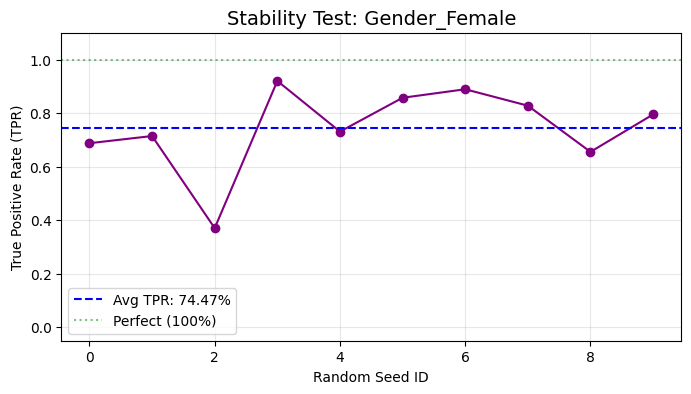

Average TPR: 0.7447

Checking stability for: Marital_Status_Single


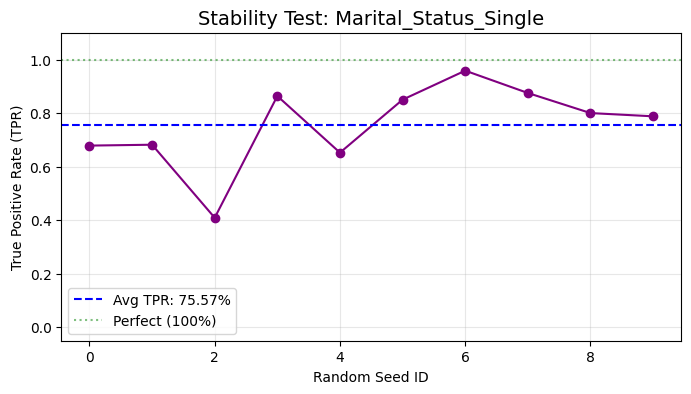

Average TPR: 0.7557



In [52]:
# 1. Test Female (Gender_Male = 0 -> Female)
test_stability(X, y, feature_keyword="Gender", value=0, group_label="Gender_Female")

# 2. Test Single (Married_Yes = 0 -> Single)
test_stability(X, y, feature_keyword="Married", value=0, group_label="Marital_Status_Single")